Get the implicit utility function.

In [1]:
struct Calibration
    σ::Float64           #elasticity of relative demand with respect to price         
    γ::Vector{Float64}   #intensity in each good
    ϵ::Vector{Float64}   #elasticity of relative demand with respect to income in luxury good sector
    κ::Vector{Float64}   #For Stone and Geary
    g::Vector{Float64}
end

In [2]:
cal = Calibration(
    0.5,                    # sigma=0.5 completementary goods
    [1/3, 1/3, 1/3],        #intensity
    [0.8, 1.0, 1.2],       #ELASTICITIES
    [0.05, 0.03, 0.02],     #For Stone and Geary
    [1.05, 1.02, 1.01]
)

Calibration(0.5, [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.8, 1.0, 1.2], [0.05, 0.03, 0.02], [1.05, 1.02, 1.01])

In [4]:
ρ=(cal.σ-1)/cal.σ

-1.0

# CES utility function

$$E=\sum^{\mathcal{I}}_{i=1}p_iC_i$$

$$C_i^*= \left(\frac{\gamma_i}{p_i}\right)^\sigma \frac{E}{\sum^{\mathcal{I}}_{i=1}\gamma_i^\sigma p_i^{1-\sigma}}$$

$$U(C_1^*,...,C_I^*)=\left[\sum^{\mathcal{I}}_{i=1}\gamma_iC_i^{* \rho} \right]^{\frac{1}{\rho}}

In [18]:
#Function CES
function CES_Utility(C::Vector{Float64}, p::Matrix{Float64}; cal=cal)
    #Budget, expenditure function
    E=sum(p[i]*C[i] for i = 1:length(C))
    
    #CONS
    C1=(cal.γ[1]/p[1])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[i]^(1-cal.σ) for i=1:length(cal.γ)))
    C2=(cal.γ[2]/p[2])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[i]^(1-cal.σ) for i=1:length(cal.γ)))
    C3=(cal.γ[3]/p[3])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[i]^(1-cal.σ) for i=1:length(cal.γ)))

    CB=[C1 C2 C3]
    U=sum(cal.γ[i]*CB[i]^ρ for i=1:length(CB))^(1/ρ)


    #SHARE
    ω_p=(p[1]*C1)/E
    ω_n=(p[2]*C2)/E
    ω_l=(p[3]*C3)/E

    return [U, E, C, [C1, C2, C3], [ω_p, ω_n, ω_l]]
end

CES_Utility (generic function with 2 methods)

In [27]:
#Insert an Endowment bundle
U=CES_Utility([20.0,5.0,30.0],[5.0 10.0 100.0])
println("Utility level reached ", U[1])
println("Expenditure/Wealth level ", U[2])
println("Initial Endowment ", U[3])
println("Optimal Endowment given prices ", U[4])
println("Expenditure share per good ", U[5])

Utility level reached 39.85507961286604
Expenditure/Wealth level 3150.0
Initial Endowment [20.0, 5.0, 30.0]
Optimal Endowment given prices [91.4853360856365, 64.68990152528394, 20.45674304318978]
Expenditure share per good [0.14521481918355, 0.20536476674693316, 0.6494204140695168]


In [38]:
p=[5.0 10.0 100.0]

1×3 Matrix{Float64}:
 5.0  10.0  100.0

In [41]:
u=[]
C=[]
Co=[]

scale=10.0
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res =CES_Utility([i,j,k],p)
            u=push!(u,res[1])
            Co=push!(Co, res[4])
            C=push!(C,[i j k])
        end
    end
end

[u C Co]


1000×3 Matrix{Any}:
  1.45503  [1.0 1.0 1.0]     [3.33994, 2.36169, 0.746833]
  2.72027  [1.0 1.0 2.0]     [6.24424, 4.41534, 1.39625]
  3.98551  [1.0 1.0 3.0]     [9.14853, 6.46899, 2.04567]
  5.25075  [1.0 1.0 4.0]     [12.0528, 8.52264, 2.69509]
  6.51599  [1.0 1.0 5.0]     [14.9571, 10.5763, 3.34452]
  7.78123  [1.0 1.0 6.0]     [17.8614, 12.6299, 3.99394]
  9.04647  [1.0 1.0 7.0]     [20.7657, 14.6836, 4.64336]
 10.3117   [1.0 1.0 8.0]     [23.67, 16.7372, 5.29278]
 11.577    [1.0 1.0 9.0]     [26.5743, 18.7909, 5.9422]
 12.8422   [1.0 1.0 10.0]    [29.4786, 20.8445, 6.59162]
  ⋮                          
  4.42834  [10.0 10.0 2.0]   [10.165, 7.18777, 2.27297]
  5.69358  [10.0 10.0 3.0]   [13.0693, 9.24141, 2.92239]
  6.95882  [10.0 10.0 4.0]   [15.9736, 11.2951, 3.57181]
  8.22406  [10.0 10.0 5.0]   [18.8779, 13.3487, 4.22123]
  9.4893   [10.0 10.0 6.0]   [21.7822, 15.4024, 4.87065]
 10.7545   [10.0 10.0 7.0]   [24.6865, 17.456, 5.52007]
 12.0198   [10.0 10.0 8.0]   [27.5908, 19.

In [43]:
using DataFrames
function prices(p::Vector{Float64},T::Int64 ;cal=cal)
    #Prices normalized at date t=1
    pp=[p[1]]  #price primary
    pn=[p[2]]  #price normal
    pl=[p[3]]  #price luxury
    #Relative prices
    pnp_r=[1.0]
    pnl_r=[1.0]
    #AR(1)
    shock_size=1

    for t=1:T-1
        p_p=p[1]*cal.g[1]^(t)+shock_size*randn() # price dynamics of primary goods
        p_n=p[2]*cal.g[2]^(t)+shock_size*randn() # price dynamics of normal goods
        p_l=p[3]*cal.g[3]^(t)+shock_size*randn()

        pnp=p_p/p_n
        pnl=p_l/p_n

        #for matrix
        pp=push!(pp,p_p)
        pn=push!(pn,p_n)
        pl=push!(pl,p_l)

        pnp_r=push!(pnp_r,pnp)
        pnl_r=push!(pnl_r,pnl)
        
    end
    return [pp pn pl pnp_r pnl_r]
end

T=30
p=prices([5.0, 25.0, 100.0],T)

data=DataFrame(p,:auto)

rename!(data,[:"Primary P",:"Normal P", :"LuxuryP",:"Relative P/N",:"Relative L/N"])

,Primary P,Normal P,LuxuryP,Relative P/N,Relative L/N
,Float64,Float64,Float64,Float64,Float64
1,5.0,25.0,100.0,1.0,1.0
2,4.80144,25.1082,102.999,0.19123,4.10219
3,4.00253,25.6837,101.741,0.155839,3.96131
4,5.62312,26.3471,102.33,0.213425,3.88391
5,5.77838,26.8209,103.072,0.215443,3.84296
6,6.54843,27.2269,105.714,0.240513,3.88269
7,6.09017,28.1466,106.322,0.216373,3.77743
8,7.28862,28.6151,106.839,0.254713,3.73367
9,10.5437,27.1953,109.754,0.387704,4.03578


In [46]:
#Function CES
function CES_UtilityOvertime(C::Vector{Float64}, p::Matrix{Float64}, T::Int64; cal=cal)
    #Budget, expenditure function
    Exp=[]
    Cons=[]
    Share=[]
    Utility=[]

    for t=1:T
        E=sum(p[t,i]*C[i] for i = 1:length(C))
        
        #CONS
        C1=(cal.γ[1]/p[t,1])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[t,i]^(1-cal.σ) for i=1:length(cal.γ)))
        C2=(cal.γ[2]/p[t,2])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[t,i]^(1-cal.σ) for i=1:length(cal.γ)))
        C3=(cal.γ[3]/p[t,3])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[t,i]^(1-cal.σ) for i=1:length(cal.γ)))

        CB=[C1 C2 C3]
        U=sum(cal.γ[i]*CB[i]^ρ for i=1:length(CB))^(1/ρ)


        #SHARE
        ω_p=(p[t,1]*C1)/E
        ω_n=(p[t,2]*C2)/E
        ω_l=(p[t,3]*C3)/E

        ω=[ω_p,ω_n,ω_l]

        Exp=push!(Exp,E)
        Cons=push!(Cons,CB)
        Utility=push!(Utility,U)
        Share=push!(Share, ω)

    end

    return [Exp Cons Utility Share]
end

CES_UtilityOvertime (generic function with 2 methods)

In [47]:
V=CES_UtilityOvertime([3.0,4.0,10.0], p, 30)

30×4 Matrix{Any}:
 1115.0   [28.9302 12.938 6.46899]   11.2595   [0.129732, 0.290089, 0.580179]
 1144.82  [30.1115 13.1677 6.50133]  11.4082   [0.126289, 0.288793, 0.584918]
 1132.15  [32.9869 13.0221 6.54276]  11.5407   [0.116619, 0.295415, 0.587965]
 1145.55  [27.417 12.6661 6.42699]   11.0693   [0.13458, 0.291312, 0.574108]
 1155.34  [27.1001 12.5787 6.41658]  11.0195   [0.13554, 0.292013, 0.572447]
 1185.69  [25.6577 12.5831 6.38587]  10.9074   [0.141704, 0.288944, 0.569352]
 1194.08  [26.7555 12.4456 6.40348]  10.9533   [0.136462, 0.293365, 0.570173]
 1204.72  [24.2712 12.2494 6.3394]   10.6921   [0.146842, 0.290955, 0.562203]
 1237.96  [20.131 12.5347 6.23952]   10.3548   [0.171457, 0.275362, 0.553181]
 1245.74  [23.0449 12.0367 6.30013]  10.519    [0.152152, 0.291302, 0.556547]
    ⋮                                          
 1446.43  [17.854 10.8436 6.10017]    9.61047  [0.179427, 0.295426, 0.525148]
 1429.35  [17.6283 10.9344 6.09574]   9.60828  [0.181683, 0.292907, 0.52541]
 

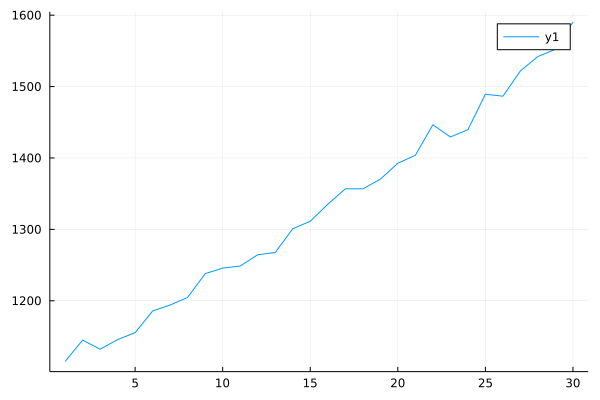

In [48]:
using Plots
#Expenditure / Wealth following fixed endowment
Exp=V[:,1]
plot(Exp)

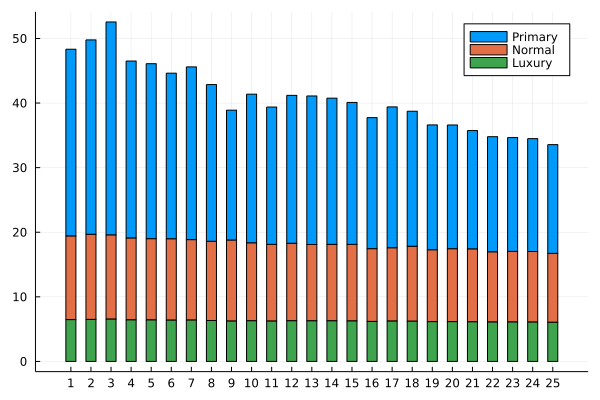

In [49]:
using StatsPlots
T=30
Primary=[]
Normal=[]
Luxury=[]
for t=1:T
    p=V[:,2][t][1]
    n=V[:,2][t][2]
    l=V[:,2][t][3]
    Primary=push!(Primary,p)
    Normal=push!(Normal,n)
    Luxury=push!(Luxury,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary Normal Luxury],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

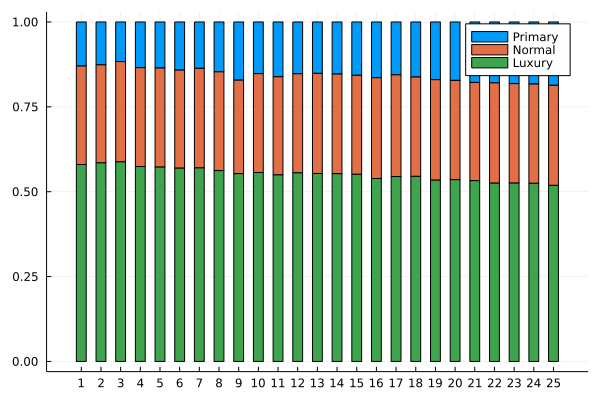

In [50]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=V[:,4][t][1]
    n=V[:,4][t][2]
    l=V[:,4][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

# Stone and Geary

In [7]:
#Function Stone and Geary
function SG(C::Vector{Int64}, cal)
    U=sum(cal.γ[i]*(C[i]+cal.κ[i])^ρ for i=1:length(C))^(1/ρ)
    return U
end

SG (generic function with 1 method)

# Non Homothetic Utility function

In [58]:
p=[5.0 10.0 100.0]

1×3 Matrix{Float64}:
 5.0  10.0  100.0

In [64]:
function solvingNH(u, C::Vector{Float64}, p::Matrix{Float64}; cal=cal)
    out=[sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^(cal.ϵ[i]))^ρ for i=1:length(C))-1,
        E-sum(p[i]*C[i] for i=1:length(C)),
        u_c1/p[1]=u_c2/p[2],
        u_c1/p[1]=u_c3/p[3],
        u_c2/p[2]=u_c3/p[3]
        ]
    return out
end

solvingNH(1.0,[1.0,2.0,3.0],p)

-0.7962962962962963

In [60]:
using NLsolve

function solvingNH(u, C::Vector{Float64}, p::Matrix{Float64}; cal=cal)
    out=sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^(cal.ϵ[i]))^ρ for i=1:length(C))-1
    return out
end

nlsolve(u->[solvingNH(u[1],[1.0, 1.0, 1.0], p)], [1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0]
 * Zero: [2.953625909142242]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [51]:
using NLsolve
u=1

#UTILITY LEVEL for a given C
function solvingNH(u, C::Vector{Float64}, p::Matrix{Float64}; cal=cal)
    out=sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^(cal.ϵ[i]))^ρ for i=1:length(C))-1
    return out
end

function NHUtility(C::Vector{Float64};cal=cal,tol=1e-10,T=1000)
    u=1.0
    res = nlsolve(u->[solvingNH(u[1], C, cal)], [1.0])
    E=sum(p[i]*C[i] for i=1:length(C))
    #Utility level for given C
    U=res.zero[1]
    #1st utility for given endowment level
    Uinit=res.zero[1]

    #Minimum expenditure for the utility at given endowment level
    Expmini=sum(cal.γ[i]*U^(cal.ϵ[i]*(1-cal.σ)) * (p[i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
    
    #Optimal Demand with income effect
    C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(-cal.σ)
    C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(-cal.σ)
    C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(-cal.σ)

    #Expenditure share with income effect
    ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(1-cal.σ)
    ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(1-cal.σ)
    ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(1-cal.σ)

    #Initial Demand for given endowment level, U initial and minimum expenditure level
    Cinit=[C1,C2,C3]
    ω_init=[ω_p, ω_n, ω_l]

    #Optimal update for demand
    C=[C1,C2,C3]
    ω=[ω_p, ω_n, ω_l]

    #Non homothetic preferences updated expenditure since we still have some wealth unused.
    ExpNH=sum(p[i]*C[i] for i=1:length(C))

    #Non homothetic preferences Expenditure have to coincide with the endowment level wealth.
    if abs(E-ExpNH)>tol
        for j=1:T
            res=nlsolve(u->[solvingNH(u[1], C, cal)], [1.0])
            U=res.zero[1]
            
            #DEMAND
            C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(-cal.σ)
            C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(-cal.σ)
            C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(-cal.σ)

            #SHARE
            ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(1-cal.σ)
            ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(1-cal.σ)
            ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(1-cal.σ)

            C=[C1, C2, C3]
            ω=[ω_p, ω_n, ω_l]
    
            ExpNH=sum(p[i]*C[i] for i =1:length(C)) 
        end
        return [U, Uinit, Expmini, E, ExpNH, C, Cinit, ω, ω_init]
    end
end

NHUtility (generic function with 1 method)

In [21]:
NHU=NHUtility(u,[1.0, 1.0, 1.0])
println("NH pref optimal utility level with no waste ", NHU[1])
println("Utility level reached at given endowment ", NHU[2])
println("Above can be reached with minimal cost ", NHU[3])
println("But we have to spend all the wealth so that there is no waste ", NHU[4])
println("Hence NH expenditure will coincide with the wealth ", NHU[5])
println("With bundle (updated) ", NHU[6])
println("Whereas endowment level utility can be reached with this bundle ", NHU[7])
println("Optimal share with no waste ", NHU[8])
println("Optimal share initial with waste ", NHU[9])

NH pref optimal utility level with no waste 2.9763253850310485
Utility level reached at given endowment 2.953625909142242
Above can be reached with minimal cost 297.67903342096935
But we have to spend all the wealth so that there is no waste 300.0
Hence NH expenditure will coincide with the wealth 300.0
With bundle (updated) [0.8931235396603288, 0.9960464154230043, 1.1108300449166675]
Whereas endowment level utility can be reached with this bundle [0.886941680287088, 0.9883951671048457, 1.1014534868177601]
Optimal share with no waste [0.2977078465534429, 0.33201547180766805, 0.37027668163888916]
Optimal share initial with waste [0.29795235159635847, 0.33203385396212465, 0.370013794441517]


In [28]:
u=[]
C=[]

scale=5.0
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res =NHUtility(u,[i,j,k])
            u=push!(u,res[1])
            C=push!(C,[i j k])
        end
    end
end

125×2 Matrix{Any}:
  2.97633  [1.0 1.0 1.0]
  3.95007  [1.0 1.0 2.0]
  4.91634  [1.0 1.0 3.0]
  5.87618  [1.0 1.0 4.0]
  6.83034  [1.0 1.0 5.0]
  3.95007  [1.0 2.0 1.0]
  4.91634  [1.0 2.0 2.0]
  5.87618  [1.0 2.0 3.0]
  6.83034  [1.0 2.0 4.0]
  7.77942  [1.0 2.0 5.0]
  ⋮        
 10.6006   [5.0 4.0 2.0]
 11.5333   [5.0 4.0 3.0]
 12.4627   [5.0 4.0 4.0]
 13.389    [5.0 4.0 5.0]
 10.6006   [5.0 5.0 1.0]
 11.5333   [5.0 5.0 2.0]
 12.4627   [5.0 5.0 3.0]
 13.389    [5.0 5.0 4.0]
 14.3122   [5.0 5.0 5.0]

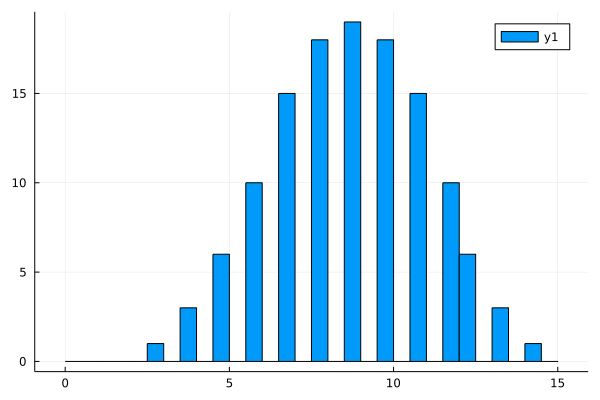

In [30]:
using Plots, Distributions
histogram(NH[:,1]; bins = 0:0.5:15)


In [31]:
#Price dynamics
using Plots, DataFrames

function pricedynamics(T::Int64;cal=cal,N=3)
#Time and number of household considered
    #Get our price level dynamics
    shock_size=5
    index=100.0 
    pp=[p[1]]  #price primary
    pn=[p[2]]  #price normal
    pl=[p[3]]  #price luxury
    agg=[1/N*(p[1]+p[2]+p[3])] #aggregate price with homothetic

    for t=1:T-1
        p_p=100*cal.g[1]^(t)+shock_size*randn() # price dynamics of primary goods
        p_n=100*cal.g[2]^(t)+shock_size*randn() # price dynamics of normal goods
        p_l=100*cal.g[3]^(t)+shock_size*randn()
        agg_p=0.333*p_p+0.333*p_n+0.333*p_l #share coming from homothetic consumption bundle

        pp=push!(pp,p_p)
        pn=push!(pn,p_n)
        pl=push!(pl,p_l)
        agg=push!(agg,agg_p)
    end

    pricesplot = [pp pn pl agg]
    return plot(pricesplot, title="Prices dynamics", label=["Primary" "Normal" "Luxury" "Aggregate"], lw=2)
end
    

pricedynamics (generic function with 1 method)

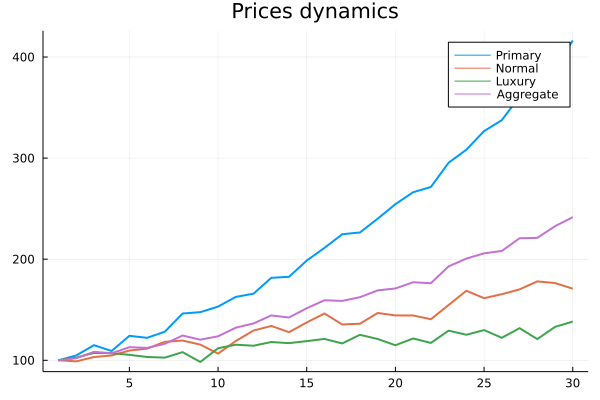

In [33]:
pricedynamics(30)

In [61]:
function prices(T::Int64 ;cal=cal)
    #Prices normalized at date t=1
    pp=[p[1]]  #price primary
    pn=[p[2]]  #price normal
    pl=[p[3]]  #price luxury
    #Relative prices
    pnp_r=[1.0]
    pnl_r=[1.0]
    #AR(1)
    shock_size=5

    for t=1:T-1
        p_p=100*cal.g[1]^(t)+shock_size*randn() # price dynamics of primary goods
        p_n=100*cal.g[2]^(t)+shock_size*randn() # price dynamics of normal goods
        p_l=100*cal.g[3]^(t)+shock_size*randn()

        pnp=p_p/p_n
        pnl=p_l/p_n

        #for matrix
        pp=push!(pp,p_p)
        pn=push!(pn,p_n)
        pl=push!(pl,p_l)

        pnp_r=push!(pnp_r,pnp)
        pnl_r=push!(pnl_r,pnl)
        
    end
    return [pp pn pl pnp_r pnl_r]
end

T=30
p=prices(T)

data=DataFrame(p,:auto)

rename!(data,[:"Primary P",:"Normal P", :"LuxuryP",:"Relative P/N",:"Relative L/N"])

,Primary P,Normal P,LuxuryP,Relative P/N,Relative L/N
,Float64,Float64,Float64,Float64,Float64
1,100.0,100.0,100.0,1.0,1.0
2,113.52,101.967,100.504,1.1133,0.985643
3,118.194,104.964,106.942,1.12605,1.01885
4,116.12,107.92,104.68,1.07598,0.969981
5,125.501,106.474,103.379,1.17871,0.970936
6,129.137,114.885,101.879,1.12405,0.886784
7,138.697,117.587,109.965,1.17953,0.935178
8,141.915,111.596,109.472,1.27169,0.980965
9,142.97,121.374,104.144,1.17793,0.858036


In [62]:
p

30×5 Matrix{Float64}:
 100.0    100.0    100.0    1.0      1.0
 113.52   101.967  100.504  1.1133   0.985643
 118.194  104.964  106.942  1.12605  1.01885
 116.12   107.92   104.68   1.07598  0.969981
 125.501  106.474  103.379  1.17871  0.970936
 129.137  114.885  101.879  1.12405  0.886784
 138.697  117.587  109.965  1.17953  0.935178
 141.915  111.596  109.472  1.27169  0.980965
 142.97   121.374  104.144  1.17793  0.858036
 159.998  117.997  106.188  1.35595  0.899926
   ⋮                                 
 281.559  161.36   125.539  1.74491  0.778006
 295.948  162.681  122.564  1.81919  0.7534
 310.777  149.019  125.083  2.08548  0.839375
 320.539  158.363  119.218  2.02408  0.752815
 340.129  173.079  124.76   1.96516  0.720823
 348.804  167.24   131.634  2.08565  0.787096
 373.905  173.485  129.117  2.15525  0.744255
 383.88   183.345  131.57   2.09376  0.71761
 412.541  178.317  139.765  2.31353  0.783802

In [63]:
function NHUtilityExp(u,C::Vector{Float64}, E;cal=cal,tol=1e-10,T=1000)
    u=1.0
    res = nlsolve(u->[solvingNH(u[1], C, cal)], [1.0])
    #Utility level for given C
    U=res.zero[1]
    #1st utility for given endowment level
    Uinit=res.zero[1]

    #Minimum expenditure for the utility at given endowment level
    Expmini=sum(cal.γ[i]*U^(cal.ϵ[i]*(1-cal.σ)) * (p[i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
    
    #Optimal Demand with income effect
    C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(-cal.σ)
    C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(-cal.σ)
    C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(-cal.σ)

    #Expenditure share with income effect
    ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(1-cal.σ)
    ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(1-cal.σ)
    ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(1-cal.σ)

    #Initial Demand for given endowment level, U initial and minimum expenditure level
    Cinit=[C1,C2,C3]
    ω_init=[ω_p, ω_n, ω_l]

    #Optimal update for demand
    C=[C1,C2,C3]
    ω=[ω_p, ω_n, ω_l]

    #Non homothetic preferences updated expenditure since we still have some wealth unused.
    ExpNH=sum(p[i]*C[i] for i=1:length(C))

    #Non homothetic preferences Expenditure have to coincide with the endowment level wealth.
    if abs(E-ExpNH)>tol
        for j=1:T
            res=nlsolve(u->[solvingNH(u[1], C, cal)], [1.0])
            U=res.zero[1]
            
            #DEMAND
            C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(-cal.σ)
            C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(-cal.σ)
            C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(-cal.σ)

            #SHARE
            ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(1-cal.σ)
            ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(1-cal.σ)
            ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(1-cal.σ)

            C=[C1, C2, C3]
            ω=[ω_p, ω_n, ω_l]
    
            ExpNH=sum(p[i]*C[i] for i =1:length(C)) 
        end
        return [U, ExpNH, C, ω] #[U, Uinit, miniEforUinit, E,  ExpNH, C, Cinit, ω, ω_init]
    end
end

NHUtilityExp (generic function with 1 method)

In [72]:
function NHUtilitytime(u,C::Vector{Float64}, T ;cal=cal,tol=1e-10)
    u=1.0
    res = nlsolve(u->[solvingNH(u[1], C, cal)], [1.0])
    Exp=[]
    miniExp=[]
    Cons=[]
    Share=[]
    NH=[]
    Utility=[]

    #Utility level for given C
    U=res.zero[1]
    #1st utility for given endowment level
    Uinit=res.zero[1]

    for t=1:T
        #Wealth level
        E=sum(p[t,i]*C[i] for i = 1:length(C))
        
        #Minimum expenditure for the utility at given endowment level
        miniEforUinit=sum(cal.γ[i]*U^(cal.ϵ[i]*(1-cal.σ)) * (p[t,i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
        
        #Optimal demand with income effect
        c_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[t,1]/miniEforUinit)^(-cal.σ)
        c_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[t,2]/miniEforUinit)^(-cal.σ)
        c_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[t,3]/miniEforUinit)^(-cal.σ)
        
        #Expenditure share with income effect
        ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[t,1]/miniEforUinit)^(1-cal.σ)
        ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[t,2]/miniEforUinit)^(1-cal.σ)
        ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[t,3]/miniEforUinit)^(1-cal.σ)
        
        Consumption=[c_p, c_n, c_l]

        res=nlsolve(u->[solvingNH(u[1], Consumption, cal)], [1.0])
        U=res.zero[1]
        
        NHmax=NHUtilityExp(u,Consumption, E)
        Cons=push!(Cons, Consumption)
        
        ω=[ω_p, ω_n, ω_l]
        Share=push!(Share, ω)
        Utility=push!(Utility, U)

        Exp=push!(Exp,E)
        miniExp=push!(miniExp,miniEforUinit)
        NH=push!(NH, NHmax)
    end

    #STORE VALUE
    value=[]
    for v=1:4
        for t =1:T
        val=NH[t][v]
        value=push!(value,val)
        end
    end
    NH=(reshape(value,T,4))

    return [Utility Cons Share NH]
end

NHUtilitytime (generic function with 1 method)

In [73]:
p

30×5 Matrix{Float64}:
 100.0    100.0    100.0    1.0      1.0
 113.52   101.967  100.504  1.1133   0.985643
 118.194  104.964  106.942  1.12605  1.01885
 116.12   107.92   104.68   1.07598  0.969981
 125.501  106.474  103.379  1.17871  0.970936
 129.137  114.885  101.879  1.12405  0.886784
 138.697  117.587  109.965  1.17953  0.935178
 141.915  111.596  109.472  1.27169  0.980965
 142.97   121.374  104.144  1.17793  0.858036
 159.998  117.997  106.188  1.35595  0.899926
   ⋮                                 
 281.559  161.36   125.539  1.74491  0.778006
 295.948  162.681  122.564  1.81919  0.7534
 310.777  149.019  125.083  2.08548  0.839375
 320.539  158.363  119.218  2.02408  0.752815
 340.129  173.079  124.76   1.96516  0.720823
 348.804  167.24   131.634  2.08565  0.787096
 373.905  173.485  129.117  2.15525  0.744255
 383.88   183.345  131.57   2.09376  0.71761
 412.541  178.317  139.765  2.31353  0.783802

In [89]:
X=NHUtilitytime(u,[4.0, 3.0, 10.0], 30)
X[:,[4,6,7]]

30×3 Matrix{Any}:
  758.732  [150.117, 291.365, 565.518]  [0.149073, 0.28934, 0.561587]
  762.653  [150.847, 292.933, 568.855]  [0.148965, 0.289278, 0.561757]
  807.52   [159.187, 310.902, 607.21]   [0.147765, 0.288594, 0.563641]
  791.855  [156.278, 304.623, 593.782]  [0.148175, 0.288829, 0.562996]
  783.061  [154.644, 301.1, 586.261]    [0.14841, 0.288963, 0.562628]
  772.917  [152.757, 297.04, 577.601]   [0.148683, 0.289119, 0.562198]
  829.239  [163.216, 319.617, 625.89]   [0.147211, 0.288275, 0.564514]
  825.799  [162.578, 318.236, 622.927]  [0.147297, 0.288325, 0.564378]
  789.16   [155.777, 303.543, 591.476]  [0.148247, 0.28887, 0.562883]
  803.73   [158.484, 309.382, 603.958]  [0.147864, 0.28865, 0.563486]
    ⋮                                   
  940.922  [183.847, 364.596, 723.049]  [0.144592, 0.286747, 0.568662]
  921.029  [180.182, 356.565, 705.613]  [0.145032, 0.287006, 0.567961]
  938.356  [183.375, 363.56, 720.798]   [0.144648, 0.28678, 0.568572]
  898.712  [176.066, 34

In [90]:
X=NHUtilitytime(u,[10.0, 10.0, 10.0], 30)
X[:,[4,6,7]]

30×3 Matrix{Any}:
 27.8833  [6.91158, 9.64077, 13.4476]  [0.230386, 0.321359, 0.448255]
 29.3056  [7.23596, 10.1436, 14.2196]  [0.228993, 0.321008, 0.449999]
 30.5572  [7.52051, 10.5867, 14.9029]  [0.227825, 0.32071, 0.451465]
 30.4348  [7.49272, 10.5433, 14.8359]  [0.227937, 0.320739, 0.451324]
 31.0225  [7.62608, 10.7515, 15.1578]  [0.227404, 0.320602, 0.451995]
 31.9555  [7.83742, 11.0822, 15.6705]  [0.22658, 0.320387, 0.453033]
 33.751   [8.24293, 11.7195, 16.6624]  [0.225063, 0.319988, 0.454949]
 33.4631  [8.17802, 11.6173, 16.5029]  [0.225301, 0.320051, 0.454648]
 33.9482  [8.28738, 11.7896, 16.7718]  [0.224902, 0.319945, 0.455153]
 35.3289  [8.59805, 12.2804, 17.5399]  [0.223801, 0.31965, 0.456549]
  ⋮                                    
 51.3287  [12.1443, 18.0056, 26.6959]  [0.213636, 0.316745, 0.469619]
 52.422   [12.3835, 18.3991, 27.3368]  [0.213071, 0.316574, 0.470356]
 52.7381  [12.4526, 18.5129, 27.5224]  [0.21291, 0.316525, 0.470566]
 53.8726  [12.7005, 18.9215, 28.1899

In [91]:
X=NHUtilitytime(u,[3.0, 3.0, 10.0], 30)
Umin=X[:,[1,4]];
C=X[:,[2,6]];
Share=X[:,[3,7]];
Exp=X[:,5];

In [92]:
C

30×2 Matrix{Any}:
 [3.39234, 4.37939, 5.65364]  [3.96323, 5.20388, 6.83289]
 [3.25013, 4.42711, 5.75671]  [4.07605, 5.36841, 7.07051]
 [3.25886, 4.46436, 5.70977]  [4.26658, 5.64737, 7.47502]
 [3.28036, 4.39277, 5.75799]  [4.22313, 5.58363, 7.38242]
 [3.173, 4.44721, 5.82648]    [4.24662, 5.61808, 7.43245]
 [3.16979, 4.33849, 5.94763]  [4.29256, 5.68551, 7.53047]
 [3.1481, 4.41385, 5.8923]    [4.54703, 6.06043, 8.07754]
 [3.09316, 4.50305, 5.86941]  [4.51847, 6.01823, 8.0158]
 [3.09603, 4.33789, 6.04561]  [4.47362, 5.95204, 7.91903]
 [2.9713, 4.46666, 6.07846]   [4.60595, 6.14757, 8.20517]
 ⋮                            
 [2.64881, 4.51702, 6.61111]  [6.05779, 8.32978, 11.4539]
 [2.59696, 4.52187, 6.72543]  [6.0938, 8.38469, 11.5368]
 [2.52976, 4.71625, 6.64559]  [6.15316, 8.47529, 11.6737]
 [2.50622, 4.60306, 6.84884]  [6.15039, 8.47106, 11.6674]
 [2.51176, 4.54561, 6.91182]  [6.47665, 8.97062, 12.4249]
 [2.50102, 4.66285, 6.78504]  [6.635, 9.21406, 12.7956]
 [2.45043, 4.64415, 6.9496]

In [93]:
Exp

30-element Vector{Any}:
 1600.0000000002574
 1651.497654011012
 1738.8976612185313
 1718.9180588711927
 1729.715042042298
 1750.853280516048
 1868.5004354224407
 1855.249581322442
 1834.4692255485786
 1895.8689704053463
    ⋮
 2584.145726304132
 2601.529677285711
 2630.2199451858005
 2628.8808603418693
 2787.2198666615695
 2864.466220320018
 2933.3442323204454
 3017.372187419912
 3170.223067932364

In [94]:
Umin

30×2 Matrix{Any}:
 12.8571  15.2327
 12.8571  15.7056
 12.8571  16.5067
 12.8571  16.3238
 12.8571  16.4227
 12.8571  16.6162
 12.8571  17.6912
 12.8571  17.5703
 12.8571  17.3805
 12.8571  17.9408
  ⋮       
 12.8571  24.1653
 12.8571  24.3213
 12.8571  24.5787
 12.8571  24.5667
 12.8571  25.9846
 12.8571  26.6748
 12.8571  27.2893
 12.8571  28.038
 12.8571  29.3972

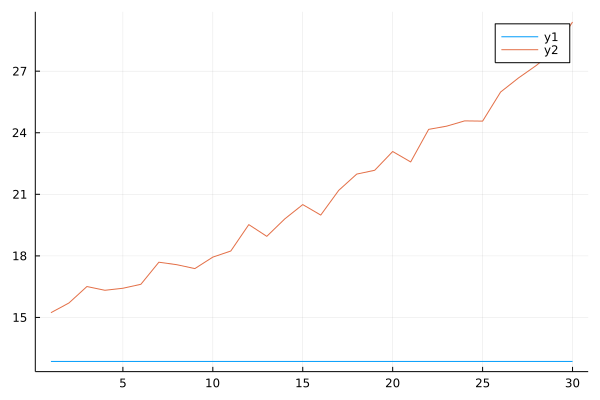

In [95]:
plot(Umin[:,1])
plot!(Umin[:,2])

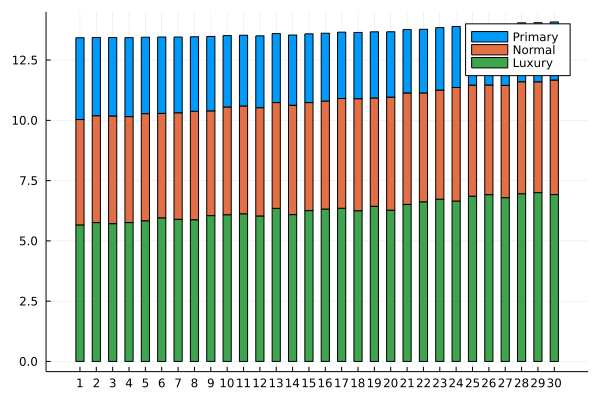

In [96]:
using StatsPlots
Primary=[]
Normal=[]
Luxury=[]
for t=1:T
    p=C[:,1][t][1]
    n=C[:,1][t][2]
    l=C[:,1][t][3]
    Primary_s=push!(Primary,p)
    Normal_s=push!(Normal,n)
    Luxury_s=push!(Luxury,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary Normal Luxury],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

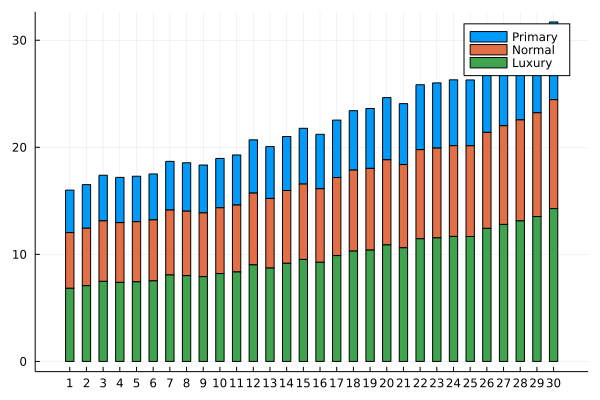

In [97]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=C[:,2][t][1]
    n=C[:,2][t][2]
    l=C[:,2][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

In [98]:
Share

30×2 Matrix{Any}:
 [0.252681, 0.326203, 0.421116]  [0.247702, 0.325242, 0.427056]
 [0.263738, 0.322687, 0.413576]  [0.24681, 0.325063, 0.428127]
 [0.26303, 0.319994, 0.416976]   [0.245361, 0.324767, 0.429871]
 [0.261307, 0.325209, 0.413484]  [0.245685, 0.324834, 0.429481]
 [0.270148, 0.321228, 0.408624]  [0.24551, 0.324798, 0.429692]
 [0.270422, 0.329278, 0.4003]    [0.245169, 0.324728, 0.430103]
 [0.272285, 0.323656, 0.404059]  [0.243352, 0.324347, 0.432301]
 [0.277121, 0.317244, 0.405635]  [0.24355, 0.324389, 0.43206]
 [0.276864, 0.329323, 0.393812]  [0.243865, 0.324456, 0.43168]
 [0.288487, 0.319829, 0.391684]  [0.242947, 0.324261, 0.432792]
 ⋮                               
 [0.32361, 0.316264, 0.360126]   [0.234421, 0.322342, 0.443237]
 [0.330071, 0.315924, 0.354005]  [0.234239, 0.322298, 0.443463]
 [0.338838, 0.302903, 0.358258]  [0.233941, 0.322227, 0.443832]
 [0.342022, 0.310352, 0.347626]  [0.233955, 0.322231, 0.443815]
 [0.341267, 0.314274, 0.344459]  [0.23237, 0.321848, 0.44

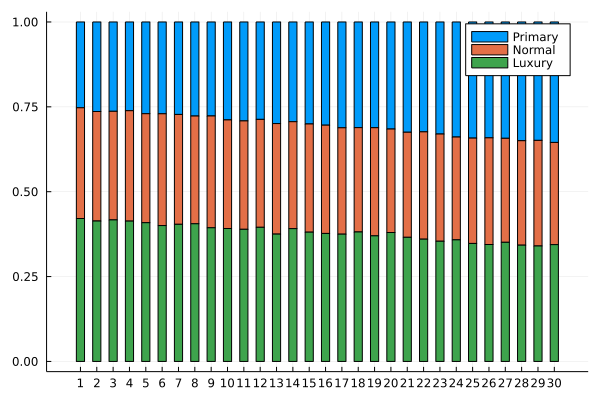

In [99]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=Share[:,1][t][1]
    n=Share[:,1][t][2]
    l=Share[:,1][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

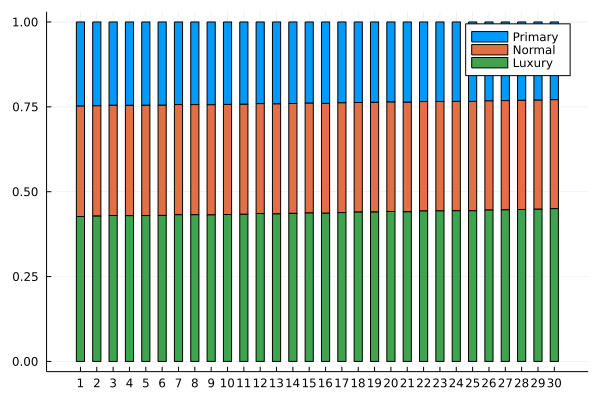

In [100]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=Share[:,2][t][1]
    n=Share[:,2][t][2]
    l=Share[:,2][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])